First Steps
===========

Running functions via Fiatlight
-------------------------------

### Running a single function

It is extremely simple to run and test a function with FiatLight.
Below is a function that accepts a text path as a parameter and outputs the number of words in this text file.

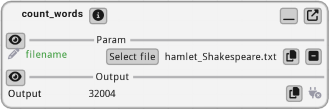

In [1]:
import fiatlight as fl
# Note: TextPath is a synonym for str
#       Within fiatlight, it is associated with a file dialog widget
from fiatlight.fiat_types import TextPath

def count_words(filename: TextPath) -> int:
    """Count the number of words in a text file."""
    with open(filename, "r") as f:
        text = f.read()
    return len(text.split())

# Run the application
fl.run(count_words, app_name="Count Words")

*Note: TextPath is an alias for str, but it is associated with a file dialog widget in Fiatlight.*

### Composing two functions

Below we create a simple application with two functions: "int_source" and "add":

* "int_source" generates an integer value
* "add" adds two or three integer values.

We specify the range of values for the input parameters of the functions using
* either the `fl.add_fiat_attributes` function,
* or the `@fl.with_fiat_attributes` decorator

Finally, we run the application using the "fl.run" function.

**Code**

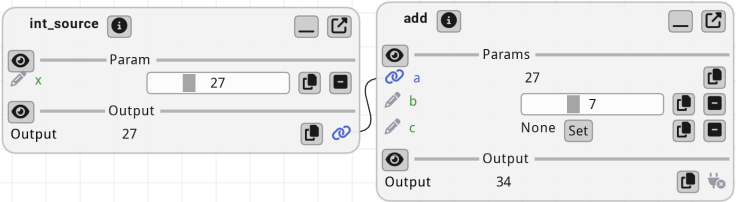

In [4]:
import fiatlight as fl


def int_source(x: int) -> int:
    """int_source is the first function of the application
    Since it is not linked to any other function, fiatlight will ask
    the user to specify the value of "x".
    As such, it serves as a source for the next function.
    """
    return x


# Customize the GUI for the `int_source` function. Below, we specify
# the range of values for "x" by adding "fiat_attributes"
fl.add_fiat_attributes(int_source, x__range=(0, 100))


# This second function adds the values of "a", "b", and "c"
# In this case, we add fiat_attributes using a decorator
# to specify the range of values for "a" and "b"
@fl.with_fiat_attributes(a__range=(0, 10), b__range=(0, 20))
def add(a: int, b: int = 0, c: int | None = None) -> int:
    """add is the second function of the application
    It adds the values of "a", "b", and "c" and returns the result.

    In the interface:
    - "a" is linked to the output of int_source and is unspecified
       until "x" is specified in int_source.
    - "b" is equal to its default value (0). It is shown in gray to
       indicate that it is using the default value.
    - "c" is an optional, equal to its default value (None). It is also shown in gray.
      In order to specify a value for "c", the user must first click on the
      "Set" button, to specify that this optional has a value, and then specify the value.
    """
    if c is None:
        c = 0
    return a + b + c


# Run the application, which is a GUI around the composition of the two functions
# Notes:
#  - if running a single function, you can use fl.run(your_function)
#  - the app_name parameter is optional. It defines the name of the settings file, and the name of the window
fl.run([int_source, add], app_name="First Example")

*The image above shows the default state of the application*
> * int_source:
>   * "x" is unspecified
> * add:
>   * "a" is linked to the output of int_source and is unspecified, since int_source can not be executed (until "x" is specified)
>   * "b" is equal to its default value (0). It is shown in gray to indicate that it is using the default value.
>   * "c" is equal to its default value (None). It is also shown in gray.

Video Tutorial of the available controls
-----------------------------------------------

*The video below shows how to interact with the widgets in a function node*

<video controls>
  <source src="_static/videos/basic_manip.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>


Save / Load user settings
-------------------------

**Automatic user settings saving**

Upon exit, Fiatlight automatically saves the user's settings in a folder named `fiat_settings` in the current directory.

The settings are named after the app_name param passed to `fl.run (if app_name is not set, the settings file will use the name of the main application module)

![settings_file.png](images/settings_file.png).


Three files are saved each time the application saves the settings:
* First_Example.fiat_user.json: user settings (values of the parameters of the functions)
* First_Example.node_editor.json: settings for the node editor (positions of the nodes)
* First_Example.ini: settings for Dear ImGui (since and positions of the window)

**Manually save the user settings**

When you manually save the user inputs by clicking on the menu "File / Save user settings", the user settings are saved in a file named "xxx.fiat_user.json", where "xxx" is the file name you selected.



Additional Run parameters
-----------------

* **top_most**: `fl.run()` also accept a boolean parameter `top_most` to specify whether the window should stay on top of other windows.

* via **FiatRunParams**:
  For more control over the application, you can use the `FiatRunParams` class:

In [6]:
from imgui_bundle import hello_imgui

params = fl.FiatRunParams(
    app_name="My App",
    window_size=(1920, 1080),
    enable_idling=True,  # Save CPU when idle
    theme=hello_imgui.ImGuiTheme_.darcula_darker,
    remember_theme=True,  # Save user's theme choice
    top_most=False,
    delete_settings=False  # Delete settings on startup
)

# Then, call
#     fiatlight.run(my_function, params=params)

Running in Jupyter Notebooks
----------------------------

Fiatlight provides special support for Jupyter notebooks through the `fiatlight.nb` module. This module offers two modes of operation:

1. **Blocking mode** with the standard `fl.run()`: in this mode, the application runs and captures a screenshot when closed, displaying it in the cell output.
2. **Non-blocking mode** with `fl.nb.start()` / `fl.nb.stop()` / `fl.nb.is_running()`

:::{Note}
* The `app_name` parameter is **required** when running in notebooks, as it determines where settings are saved.
* When running in a notebook, it is recommended to pass `top_most=True` to keep the application window above the notebook interface.
:::

### Blocking Mode with Screenshot


When you call `fl.run()` directly in a Jupyter notebook, Fiatlight automatically:

1. Runs the application in blocking mode: no other cells can be executed until the application window is closed.
2. Captures a screenshot of the application when you close it
3. Displays the screenshot in the notebook cell output

This is useful for documentation and tutorials where you want to capture the final state of the application.

In the cell below, running `fl.run()` will display a screenshot when the window is closed:

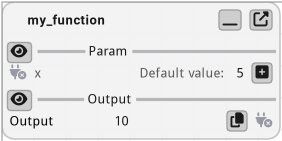

In [2]:
import fiatlight as fl

def my_function(x: int = 5) -> int:
    return x * 2

# Run in blocking mode - a screenshot will appear in the output when closed
fl.run(my_function, app_name="Screenshot Demo", top_most=True)

### Non-Blocking Mode

In non-blocking mode, the application runs in the background, allowing you to continue working in your notebook.
For this mode, use the following functions from the `fiatlight.nb` module: `fl.nb.start()`, `fl.nb.stop()`, `fl.nb.is_running()`

#### Starting an Application

The cell below starts the application without blocking the notebook: the GUI window appears, and you can interact with it while continuing to run other cells. It stays on top of other windows (top_most=True). No screenshot is captured when the application is closed (this is why the cell output below is empty).

In [3]:
import fiatlight as fl

def my_function(x: int = 5) -> int:
    return x * 2

# Start the application (non-blocking)
fl.nb.start(my_function, app_name="Notebook App", top_most=True)

# The cell completes immediately, and the GUI runs in the background

#### Checking Status

In [4]:
# Check if an application is running
if fl.nb.is_running():
    print("Application is running")
else:
    print("No application is running")

Application is running


#### Stopping an Application

In [5]:
# Stop the application
fl.nb.stop()

Async Run
-------

For async workflows, Fiatlight provides `fl.run_async()`, which runs the application asynchronously without blocking the calling code.

`fl.run_async()` accepts exactly the same parameters as `fl.run()`.

**example usage:**

In [11]:
import fiatlight as fl

def my_function(x: int = 5) -> int:
    return x * 2

# You may Run the async function with asyncio, for example:
#    await fl.run_async(my_function, app_name="Async App")

_Note: only one instance of fiatlight can run at a time, even in async mode._